## 건강진단 데이터 전처리

In [1]:
import pandas as pd                                 
import numpy as np                                     
import matplotlib.pyplot as plt                        
import seaborn as sns                                   
%matplotlib inline

from IPython.display import display                    
import warnings                                         
warnings.filterwarnings('ignore')

In [42]:
from matplotlib import font_manager, rc    # 그래프에 한글 표시를 한다
import sys

if sys.platform == 'darwin' :
    rc('font', family='AppleGothic')
else :   
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

### 공공 데이타 읽어오기
- https://www.data.go.kr 건강검진 데이타 다운로드

In [43]:
df = pd.read_csv(r"../data/건강검진정보(2017).csv", encoding='utf-8')  ## raw 문자열로 지정한다 

### 데이타 살펴보기

In [44]:
df.shape                            ## 데이터의 형상을 확인한다 

(1000000, 34)

In [45]:
df.info()                           ## 데이터프레임의 열의 자료형을 확인한다 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

### 숫자 타입의 바이트 수 조정하기

In [46]:
# 숫자 타입의 바이트 수 조정하기
for i in  df.columns :                         ## 자료형을 변환해서 메모리 사용량을 줄인다 
    if df[i].dtype == np.int64 :
        df[i] = df[i].astype(np.int16)
    if df[i].dtype == np.float64 :
        df[i] = df[i].astype(np.float32)

### 데이터 사용 메모리 절감

In [47]:
df.info()                                               ## 데이터프레임의 열의 자료형을 확인한다 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int16  
 1   가입자일련번호       1000000 non-null  int16  
 2   성별코드          1000000 non-null  int16  
 3   연령대코드(5세단위)   1000000 non-null  int16  
 4   시도코드          1000000 non-null  int16  
 5   신장(5Cm단위)     1000000 non-null  int16  
 6   체중(5Kg단위)     1000000 non-null  int16  
 7   허리둘레          999734 non-null   float32
 8   시력(좌)         999817 non-null   float32
 9   시력(우)         999811 non-null   float32
 10  청력(좌)         999842 non-null   float32
 11  청력(우)         999844 non-null   float32
 12  수축기혈압         999981 non-null   float32
 13  이완기혈압         999982 non-null   float32
 14  식전혈당(공복혈당)    999958 non-null   float32
 15  총콜레스테롤        999957 non-null   float32
 16  트리글리세라이드      999955 non-null   float32
 17  HDL콜레스테롤      999956 non-nul

## 데이타 전처리(Data Preprocessing)

## 1. 결측치 제거 

### 1) 결측치 확인 - isna(), isnull()

In [48]:
df.isna()                          ## 데이터 프레임의 결측값을 확인한다. 

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False


In [49]:
df.isna().sum()                                ## 컬럼별 결측값을 sum 메소드로 확인한다 

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

In [50]:
df.isna().sum().sum()                          ## 총 결측값을 sum 메소드로 확인한다 

4609044

### 2) 결측치 제거 및 결측치 대체 - fillna(), dropna()

In [51]:
df = df.fillna(0)                       ## 모든 결측값을 0으로 처리한다 

In [52]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,1.0,1,0.0,0.0,0.0,0.0,1.0,-3962
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,0.0,1,0.0,0.0,0.0,0.0,2.0,-3962
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,-3962
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,-3962
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,-3962


### 3) 결측치 대체 후 확인

In [53]:
df.isna().sum().sum()

0

## 2. 피처 엔지니어링 - 피처 선택 및 새로운 피처 생성 

### 1) 기존 컬럼을 이용해 새로운 데이타프레임 생성

In [54]:
df_new = df [['성별코드','신장(5Cm단위)']].copy()        

In [55]:
df_new.shape

(1000000, 2)

### 2) 새로운 피처(컬럼) 추가 - count  

In [56]:
df_new.loc[:,"count"] = 1      ##  count  열을 추가한다 

In [57]:
df_new.head()

,성별코드,신장(5Cm단위),count
0,1,170,1
1,1,180,1
2,1,165,1
3,1,175,1
4,1,165,1


In [58]:
df_new.index

RangeIndex(start=0, stop=1000000, step=1)

In [59]:
df_new["count"].count()                         

1000000

### 3) 피봇 테이블 만들기

In [60]:
import numpy as np

In [61]:
df_pivot = pd.pivot_table(df_new,  index=['신장(5Cm단위)'],        ## 피봇 테이블을 만든다. 인덱스는 신장 
                     columns=['성별코드'],                         ## 열은 성별코드 
                     values="count",                               ## 들어갈 데이터는 count
                     aggfunc= np.sum)                              ## 계산은 합으로 처리                                         

In [62]:
df_pivot.head()                                                       

성별코드,1,2
신장(5Cm단위),,
130,NaN,93.0
135,NaN,1301.0
140,6.0,9273.0
145,99.0,39507.0
150,2986.0,105849.0


### 4) 결측치 대체

In [63]:
df_pivot = df_pivot.fillna(0)                                 ## 결측치를 0으로 처리한다 

In [64]:
df_pivot.head()

성별코드,1,2
신장(5Cm단위),,
130,0.0,93.0
135,0.0,1301.0
140,6.0,9273.0
145,99.0,39507.0
150,2986.0,105849.0


## 3. 기술 통계량 확인

In [65]:
df_pivot.describe()                                        ## 기술 통계량을 확인한다 

성별코드,1,2
count,13.000000,13.000000
mean,40800.769231,36122.307692
std,56802.893131,52056.939757
min,0.000000,0.000000
25%,99.000000,93.000000
50%,6630.000000,8432.000000
75%,70336.000000,43597.000000
max,159110.000000,147717.000000


## 4. 그래프 시각화

In [66]:
import matplotlib.pyplot as plt                     
%matplotlib inline

### 1) Box 그래프

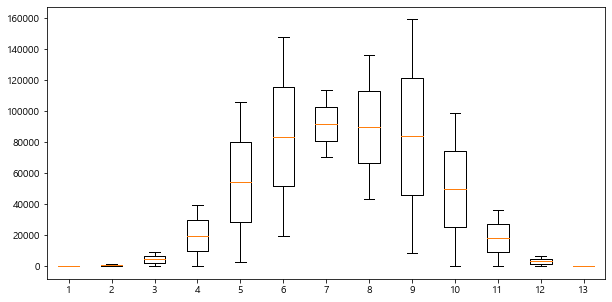

In [67]:
plt.figure(figsize=(10,5))
plt.boxplot(df_pivot)                                         
plt.show()

### 2) Box 그래프 내의 xtick 변경하기

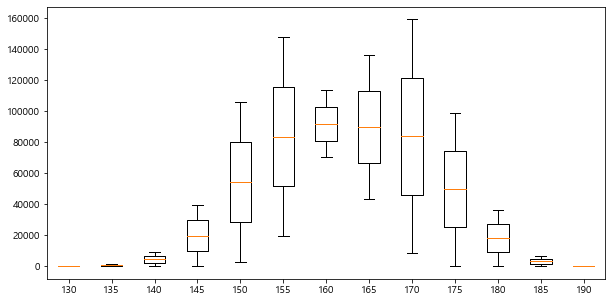

In [68]:
plt.figure(figsize=(10,5))
plt.boxplot(df_pivot)
plt.xticks([x+1 for x in range(0, df_pivot.index.shape[0])], [x for x in df_pivot.index])       
## 신장에 대한 정보로 x축이 레이블을 변경한다 
plt.show()

### 3)  성별 키 분포 확인 

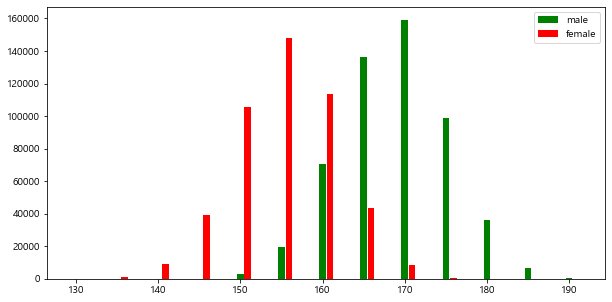

In [70]:
plt.figure(figsize=(10,5))
plt.bar(df_pivot.index, df_pivot[1], color='g', label='male')     
## 남성과 여성으로 구분해서 막대 그래프를 그린다 
plt.bar(df_pivot.index + 0.9, df_pivot[2], color='r', label='female')
plt.legend() 

## 성별로 신장과 체중의 상관관계 분석

### 1) 관심 있는 컬럼만으로 데이타프레임 생성

In [71]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [72]:
df_new2 = df[['성별코드', '신장(5Cm단위)', '체중(5Kg단위)']].copy()        ## 팬시검색으로 두 개의 열을 읽고 복사한다 

In [73]:
df_new2.head()

,성별코드,신장(5Cm단위),체중(5Kg단위)
0,1,170,75
1,1,180,80
2,1,165,75
3,1,175,80
4,1,165,60


### 2) 남자와 여자로 구분하여 데이타프레임 생성

In [74]:
df_new2.loc[:,'성별코드']

0         1
1         1
2         1
3         1
4         1
         ..
999995    1
999996    1
999997    2
999998    1
999999    1
Name: 성별코드, Length: 1000000, dtype: int16

In [75]:
df_male = df_new2[df_new2.loc[:,'성별코드']==1]
df_male.drop('성별코드', axis=1, inplace=True)
df_male.reset_index(drop=True, inplace=True)

In [76]:
df_male.head()

,신장(5Cm단위),체중(5Kg단위)
0,170,75
1,180,80
2,165,75
3,175,80
4,165,60


In [77]:
df_female = df_new2[df_new2.loc[:,'성별코드']==2]
df_female.drop('성별코드', axis=1, inplace=True)
df_female.reset_index(drop=True, inplace=True)

In [78]:
df_female.head()

,신장(5Cm단위),체중(5Kg단위)
0,150,55
1,150,55
2,160,50
3,160,65
4,170,50


In [79]:
df_male.shape, df_female.shape

((530410, 2), (469590, 2))

### 3) 상관 관계 분석

In [80]:
df_male.corr()

,신장(5Cm단위),체중(5Kg단위)
신장(5Cm단위),1.000000,0.536038
체중(5Kg단위),0.536038,1.000000


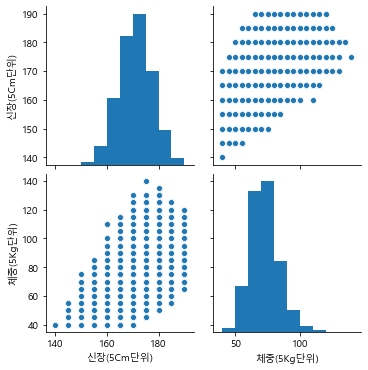

In [81]:
sns.pairplot(df_male)

In [82]:
df_female.corr()

,신장(5Cm단위),체중(5Kg단위)
신장(5Cm단위),1.00000,0.30867
체중(5Kg단위),0.30867,1.00000


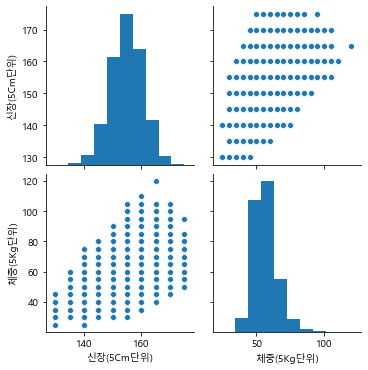

In [83]:
sns.pairplot(df_female)

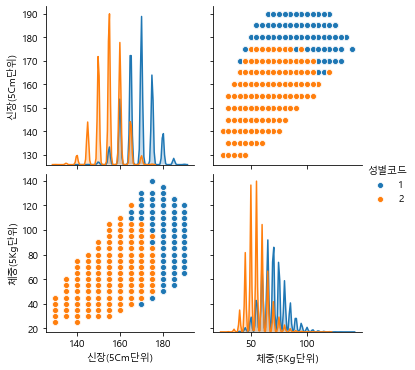

In [84]:
sns.pairplot(df_new2, hue='성별코드')